In [1]:
import numpy as np
from scipy.stats import mode

# Old code for previous 500 numbers dataset

# import csv
# true_label = []

# with open('size_500_test.csv', 'r') as file:
#     csv_reader = csv.reader(file)
#     for row in csv_reader:
#         true_label.append(int(row[0]))

# Assuming we have an array of 500 numbers stored in the variable 'numbers'
# def get_accuracy(numbers):
#     chunk_size = 100
#     num_chunks = len(numbers) // chunk_size

#     modes = []

#     for i in range(num_chunks):
#         chunk = numbers[i * chunk_size: (i + 1) * chunk_size]
#         mode_result = mode(chunk)
#         mode_value = mode_result.mode[0]
#         mode_count = mode_result.count[0]
#         modes.append((mode_value, mode_count))

#     print(modes)


In [2]:
# NEW CODE FOR BAT AND CAT DATASET
def process_fasta_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        sequence = ''
        for line in infile:
            if line.startswith('>'):
                if sequence:
                    outfile.write(sequence + '\n')
                    sequence = ''
            else:
                sequence += line.strip()
        # Write the last sequence if it exists
        if sequence:
            outfile.write(sequence + '\n')

input_file_path = 'combined_Bat_Cat_flu.fa'
output_file_path = 'combined_Bat_Cat_flu_.fa'

process_fasta_file(input_file_path, output_file_path)

In [3]:
# NEW CODE FOR BAT AND CAT DATASET
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data = pd.read_csv('similarity-matrix-batcat.csv')
similarity_matrix = data.drop(columns=['Unnamed: 0']) 
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(similarity_matrix)
kmeans_labels = np.array(kmeans.labels_)
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [4]:
# calculate accuracy, the true labels are the first 64 0s and the last 114 1s
# the predicted labels are the kmeans_labels
accuracy = 0
true_label = [0] * 64 + [1] * 114
for i in range(len(true_label)):
    if true_label[i] == kmeans_labels[i]:
        accuracy += 1
kmeans_accuracy = accuracy / len(true_label)
print(kmeans_accuracy)

0.8146067415730337


In [5]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2, random_state=42).fit(similarity_matrix)
gmm_labels = gmm.predict(similarity_matrix)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [6]:
accuracy = 0
# flip 0 to 1 and 1 to 0 in gmm_labels to match the true labels
gmm_labels = 1 - gmm_labels
true_label = [0] * 64 + [1] * 114
for i in range(len(true_label)):
    if true_label[i] == gmm_labels[i]:
        accuracy += 1
gmm_accuracy = accuracy / len(true_label)
print(gmm_accuracy)

0.797752808988764


In [7]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2,random_state=42)
spectral_clustering.fit(similarity_matrix)
spectral_labels = spectral_clustering.labels_
spectral_labels

/Users/yukewu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [8]:
accuracy = 0
true_label = [0] * 64 + [1] * 114
for i in range(len(true_label)):
    if true_label[i] == spectral_labels[i]:
        accuracy += 1
spectral_accuracy = accuracy / len(true_label)
print(spectral_accuracy)

0.7696629213483146


In [9]:
# Old code calculating gmm accuracy for previous 500 numbers dataset
# get_accuracy(gmm_labels)
# sum(gmm_labels[300:400] == 3)
# # 4-->0, 1-->1, 0-->2, 3-->3, 2-->4
# gmm_result = []
# for i in gmm_labels:
#     if i == 4:
#         gmm_result.append(0)
#     elif i == 1:
#         gmm_result.append(1)
#     elif i == 0:
#         gmm_result.append(2)
#     elif i == 3:
#         gmm_result.append(3)
#     else:
#         gmm_result.append(4)

In [10]:
# Old code calculating spectral clustering accuracy for previous 500 numbers dataset
# get_accuracy(spectral_labels)
# print(sum(gmm_labels[300:400] == 0))
# # 2-->0, 1-->1, 3-->2, 0-->3, 4-->4
# spectral_result = []
# for i in spectral_labels:
#     if i == 2:
#         spectral_result.append(0)
#     elif i == 1:
#         spectral_result.append(1)
#     elif i == 3:
#         spectral_result.append(2)
#     elif i == 0:
#         spectral_result.append(3)
#     else:
#         spectral_result.append(4)

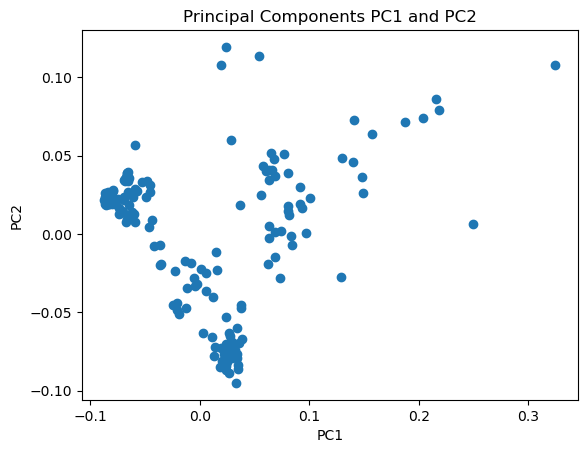

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) 

# Apply PCA on the similarity matrix
principal_components = pca.fit_transform(similarity_matrix)

# Get the PC1 and PC2 values
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components PC1 and PC2')
plt.show()

In [12]:
column_names = ['true_label', 'pc1', 'pc2', 'gmm_result', 'kmeans_result', 'spectral_result']
data = pd.DataFrame(columns=column_names)
data['true_label'] = true_label
data['pc1'] = pc1
data['pc2'] = pc2
data['gmm_result'] = gmm_labels
data['kmeans_result'] = kmeans_labels
data['spectral_result'] = spectral_labels
data.to_csv('bingo3c_result.csv', index=False)